# ANALYZING AIRBNB REAL ESTATE PORTFOLIO: INSIGHTS AND FINANCIAL EVALUATION

##  IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## GENERATING REAL ESTATE DATASET (AIRBnB PORTFOLIO)

In [2]:
# Define the number of properties to generate
num_properties = 1000

# Generate property IDs
property_ids = ['PROP' + str(i).zfill(4) for i in range(1, num_properties + 1)]

# Define ranking of locations based on cost of purchase
location_ranking = ['Beach', 'City', 'Mountain', 'Countryside']

# Generate random locations based on ranking
property_locations = [random.choice(location_ranking[:2]) for _ in range(num_properties//2)] + \
                     [random.choice(location_ranking[2:]) for _ in range(num_properties//2)]

# Generate random property types with more realistic distribution
property_types = np.random.choice(['Apartment', 'House', 'Condo'], p=[0.4, 0.4, 0.2], size=num_properties)

# Generate random property sizes in square feet, tailored to property type
property_sizes = []
for prop_type in property_types:
    if prop_type == 'Apartment':
        size = np.random.randint(500, 1500)
    elif prop_type == 'House':
        size = np.random.randint(1500, 4000)
    else:
        size = np.random.randint(800, 2000)
    property_sizes.append(size)

# Define price ranges for each location and property type (in $1000s)
price_ranges = {
    'Beach': {'Apartment': (600, 1200), 'House': (800, 2000), 'Condo': (500, 1000)},
    'City': {'Apartment': (400, 800), 'House': (600, 1500), 'Condo': (300, 700)},
    'Mountain': {'Apartment': (300, 600), 'House': (400, 1000), 'Condo': (200, 500)},
    'Countryside': {'Apartment': (200, 400), 'House': (300, 800), 'Condo': (150, 300)}
}

# Generate random purchase prices based on location and property type
purchase_prices = []
for location, prop_type in zip(property_locations, property_types):
    price_range = price_ranges[location][prop_type]
    price = np.random.randint(price_range[0], price_range[1]) * 1000
    purchase_prices.append(price)

# Define down payment percentage
down_payment_percentage = 0.20

# Calculate down payment
down_payments = np.round(np.array(purchase_prices) * down_payment_percentage, 2)

# Calculate loan amounts as 80% of the purchase price
loan_amounts = np.round(np.array(purchase_prices) * 0.80, 2)

# Generate random interest rates between 1.5% to 3%
interest_rates = np.round(np.random.uniform(0.015, 0.03, size=num_properties), 4)

# Generate random loan terms between 15 to 20 years
loan_terms = np.random.randint(15, 21, size=num_properties)

# Create a DataFrame to store the generated data
property_data = pd.DataFrame({
    'Property ID': property_ids,
    'Location': property_locations,
    'Property Type': property_types,
    'Property Size (sqft)': property_sizes,
    'Purchase Price': purchase_prices,
    'Down Payment': down_payments,
    'Loan Amount': loan_amounts,
    'Interest Rate': interest_rates,
    'Loan Term (Years)': loan_terms
})

# Display the first few rows of the generated data
print(property_data.head())

# Save the generated data to a CSV file
property_data.to_csv('real_estate_properties_generated.csv', index=False)


  Property ID Location Property Type  Property Size (sqft)  Purchase Price  \
0    PROP0001     City         Condo                  1483          440000   
1    PROP0002    Beach         House                  2949         1116000   
2    PROP0003     City         House                  3173         1344000   
3    PROP0004     City         Condo                   887          552000   
4    PROP0005    Beach     Apartment                   723          620000   

   Down Payment  Loan Amount  Interest Rate  Loan Term (Years)  
0       88000.0     352000.0         0.0170                 16  
1      223200.0     892800.0         0.0217                 18  
2      268800.0    1075200.0         0.0231                 19  
3      110400.0     441600.0         0.0261                 17  
4      124000.0     496000.0         0.0226                 19  


In [3]:
#Check data types
print(property_data.dtypes)

Property ID              object
Location                 object
Property Type            object
Property Size (sqft)      int64
Purchase Price            int64
Down Payment            float64
Loan Amount             float64
Interest Rate           float64
Loan Term (Years)         int32
dtype: object


## PORTFOLIO DISTRIBUTION

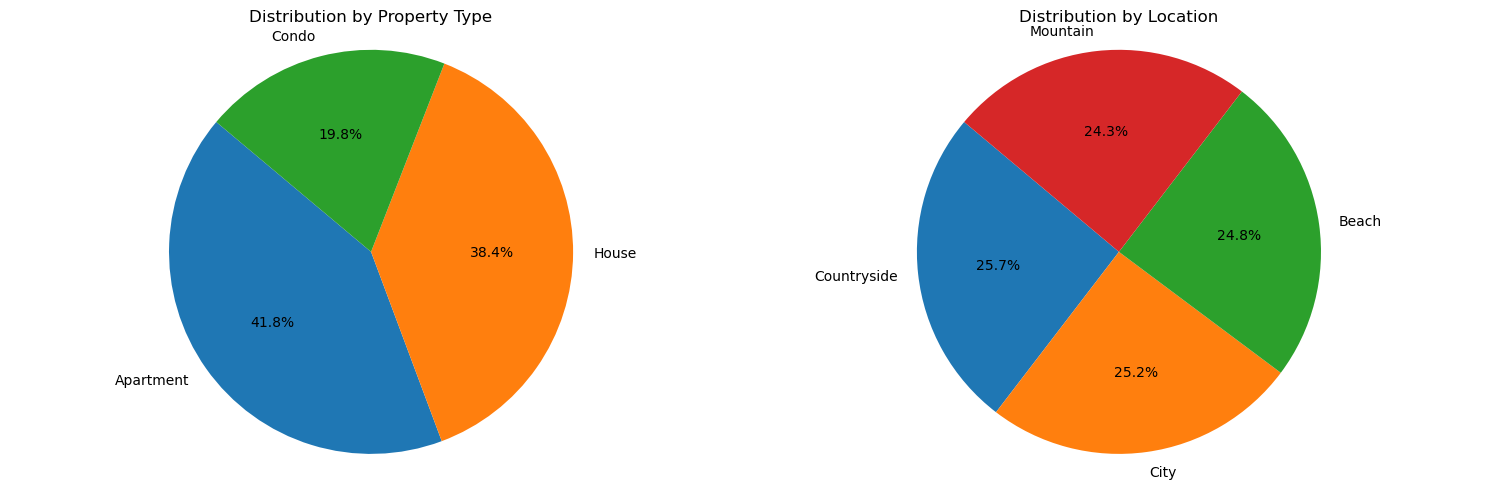

In [4]:
# Distribution by property type
property_type_counts = property_data['Property Type'].value_counts()
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Property Type')
plt.axis('equal')

# Distribution by location
location_counts = property_data['Location'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Location')
plt.axis('equal')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



## CALCULATING RENTAL INCOME ESTIMATES BASED ON LOCATION AND PROPERTY TYPE PARAMETERS

### A VACANCY RATE OF 5-15% IS RANDOMIZED ACROSS VARIOUS PROPERTIES DEPENDING ON THE COMBINATION OF LOCATION AND PROPERTY TYPE

In [5]:
# Function to estimate rental income for each property
def estimate_rental_income(row):
    location = row['Location']
    property_type = row['Property Type']
    purchase_price = row['Purchase Price']
    
    # Define vacancy rates based on property type and location
    vacancy_rates = {
        ('Beach', 'Apartment'): 0.15,
        ('Beach', 'House'): 0.1,
        ('Beach', 'Condo'): 0.12,
        ('City', 'Apartment'): 0.12,
        ('City', 'House'): 0.08,
        ('City', 'Condo'): 0.1,
        ('Mountain', 'Apartment'): 0.1,
        ('Mountain', 'House'): 0.07,
        ('Mountain', 'Condo'): 0.08,
        ('Countryside', 'Apartment'): 0.08,
        ('Countryside', 'House'): 0.05,
        ('Countryside', 'Condo'): 0.06
    }
    
    # Get the vacancy rate based on property type and location
    vacancy_rate = vacancy_rates.get((location, property_type), 0.1)  # Default to 10% if not specified
    
    # Define rental income ranges based on the purchase price
    if purchase_price <= 500000:
        min_income, max_income = 100, 200
    elif purchase_price <= 1000000:
        min_income, max_income = 200, 400
    else:
        min_income, max_income = 300, 600
        
    # Adjust rental income based on vacancy rate
    adjusted_rental_income = random.uniform(min_income, max_income) * (1 - vacancy_rate)
    
    return round(adjusted_rental_income, 2), vacancy_rate

# Estimate rental income and vacancy rate for each property
property_data['Rental Income (per night)'], property_data['Vacancy Rate'] = zip(*property_data.apply(estimate_rental_income, axis=1))

# Display the first few rows of the updated dataset
print(property_data.head())


  Property ID Location Property Type  Property Size (sqft)  Purchase Price  \
0    PROP0001     City         Condo                  1483          440000   
1    PROP0002    Beach         House                  2949         1116000   
2    PROP0003     City         House                  3173         1344000   
3    PROP0004     City         Condo                   887          552000   
4    PROP0005    Beach     Apartment                   723          620000   

   Down Payment  Loan Amount  Interest Rate  Loan Term (Years)  \
0       88000.0     352000.0         0.0170                 16   
1      223200.0     892800.0         0.0217                 18   
2      268800.0    1075200.0         0.0231                 19   
3      110400.0     441600.0         0.0261                 17   
4      124000.0     496000.0         0.0226                 19   

   Rental Income (per night)  Vacancy Rate  
0                     103.40          0.10  
1                     529.58          0.10  

## PLOTTING VACANCY RATES BY LOCATION AND PROPERTY TYPE

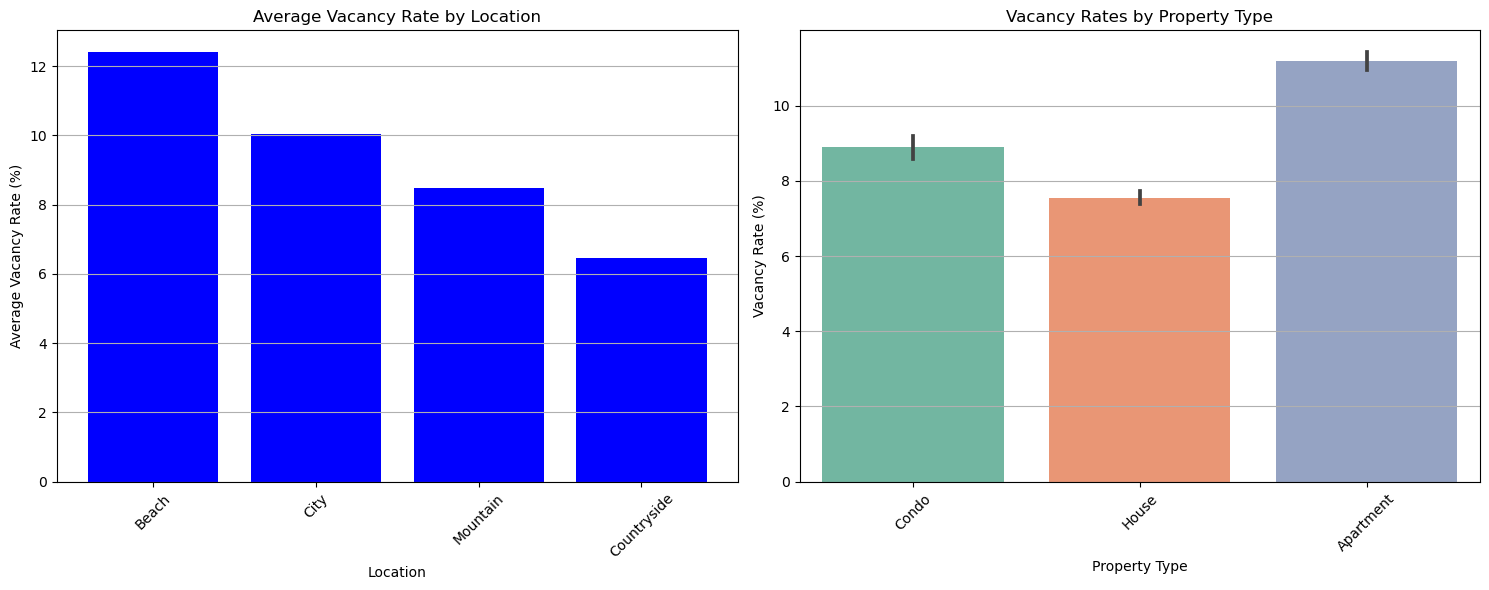

In [6]:
# Convert vacancy rate to percentages
property_data['Vacancy Rate (%)'] = property_data['Vacancy Rate'] * 100

# Create subplots for side-by-side visualization
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Average vacancy rate by location
avg_vacancy_by_location = property_data.groupby('Location')['Vacancy Rate (%)'].mean().sort_values(ascending=False)
axs[0].bar(avg_vacancy_by_location.index, avg_vacancy_by_location.values, color='blue')
axs[0].set_title('Average Vacancy Rate by Location')
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Average Vacancy Rate (%)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

# Vacancy rates by property type
sns.barplot(x='Property Type', y='Vacancy Rate (%)', data=property_data, palette='Set2', ax=axs[1])
axs[1].set_title('Vacancy Rates by Property Type')
axs[1].set_xlabel('Property Type')
axs[1].set_ylabel('Vacancy Rate (%)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [7]:
# Add a new column for yearly rental income
property_data['Yearly Rental Income'] = property_data['Rental Income (per night)'] * 365

# Display the first few rows of the updated dataset
print(property_data.head())


  Property ID Location Property Type  Property Size (sqft)  Purchase Price  \
0    PROP0001     City         Condo                  1483          440000   
1    PROP0002    Beach         House                  2949         1116000   
2    PROP0003     City         House                  3173         1344000   
3    PROP0004     City         Condo                   887          552000   
4    PROP0005    Beach     Apartment                   723          620000   

   Down Payment  Loan Amount  Interest Rate  Loan Term (Years)  \
0       88000.0     352000.0         0.0170                 16   
1      223200.0     892800.0         0.0217                 18   
2      268800.0    1075200.0         0.0231                 19   
3      110400.0     441600.0         0.0261                 17   
4      124000.0     496000.0         0.0226                 19   

   Rental Income (per night)  Vacancy Rate  Vacancy Rate (%)  \
0                     103.40          0.10              10.0   
1     

## GENERATING OPERATING EXPENSES FOR EACH PROPERTY

In [8]:
# Define ranges for different types of operating expenses (in dollars per year)
expense_ranges = {
    'Property Taxes': (0.01, 0.02),   # Assumed as a percentage of the purchase price
    'Insurance': (0.025, 0.05),       # Assumed as a percentage of the purchase price
    'Maintenance': (0.01, 0.02),      # Assumed as a percentage of the purchase price
    'Utilities': (1000, 2000),        # Fixed range
    'Property Management Fees': (0.05, 0.1),  # Assumed as a percentage of the rental income
    'Cleaning Services': (200, 1000)  # Fixed range
}

# Function to estimate operating expenses for each property
def estimate_expenses(row):
    total_expenses = 0
    for expense, expense_range in expense_ranges.items():
        if 'Property Taxes' in expense or 'Insurance' in expense or 'Maintenance' in expense:
            expense_value = row['Purchase Price'] * random.uniform(expense_range[0], expense_range[1])
        elif 'Property Management Fees' in expense:
            expense_value = row['Rental Income (per night)'] * random.uniform(expense_range[0], expense_range[1])
        else:
            expense_value = random.randint(expense_range[0], expense_range[1])
        total_expenses += expense_value
        row[expense] = expense_value
    return total_expenses 

# Estimate operating expenses for each property
property_data['Total Operating Expenses (per year)'] = np.round(property_data.apply(estimate_expenses, axis=1), 2)

# Display the first few rows of the updated dataset
print(property_data.head())

  Property ID Location Property Type  Property Size (sqft)  Purchase Price  \
0    PROP0001     City         Condo                  1483          440000   
1    PROP0002    Beach         House                  2949         1116000   
2    PROP0003     City         House                  3173         1344000   
3    PROP0004     City         Condo                   887          552000   
4    PROP0005    Beach     Apartment                   723          620000   

   Down Payment  Loan Amount  Interest Rate  Loan Term (Years)  \
0       88000.0     352000.0         0.0170                 16   
1      223200.0     892800.0         0.0217                 18   
2      268800.0    1075200.0         0.0231                 19   
3      110400.0     441600.0         0.0261                 17   
4      124000.0     496000.0         0.0226                 19   

   Rental Income (per night)  Vacancy Rate  Vacancy Rate (%)  \
0                     103.40          0.10              10.0   
1     

## CALCULATING YEARLY LOAN REPAYMENTS AND TOTAL EXPENSES

In [9]:
# Calculate yearly loan repayment and round to 2 decimal places
property_data['Yearly Loan Repayment'] = np.round(property_data['Loan Amount'] * (property_data['Interest Rate'] / 12) / (1 - (1 + property_data['Interest Rate'] / 12) ** (-property_data['Loan Term (Years)'] * 12)), 2)

# Calculate total expenses including operating expenses and yearly loan repayment
property_data['Total Expenses'] = np.round(property_data['Total Operating Expenses (per year)'] + property_data['Yearly Loan Repayment'], 2)

# Display the first few rows of the updated dataset
print(property_data.head())


  Property ID Location Property Type  Property Size (sqft)  Purchase Price  \
0    PROP0001     City         Condo                  1483          440000   
1    PROP0002    Beach         House                  2949         1116000   
2    PROP0003     City         House                  3173         1344000   
3    PROP0004     City         Condo                   887          552000   
4    PROP0005    Beach     Apartment                   723          620000   

   Down Payment  Loan Amount  Interest Rate  Loan Term (Years)  \
0       88000.0     352000.0         0.0170                 16   
1      223200.0     892800.0         0.0217                 18   
2      268800.0    1075200.0         0.0231                 19   
3      110400.0     441600.0         0.0261                 17   
4      124000.0     496000.0         0.0226                 19   

   Rental Income (per night)  Vacancy Rate  Vacancy Rate (%)  \
0                     103.40          0.10              10.0   
1     

## SUMMARY STATISTICS

In [10]:
# Display summary statistics for numerical variables
numerical_summary = property_data[['Purchase Price', 'Rental Income (per night)', 'Total Operating Expenses (per year)']].describe()
print("Summary Statistics for Numerical Variables:")
print(numerical_summary)


Summary Statistics for Numerical Variables:
       Purchase Price  Rental Income (per night)  \
count    1.000000e+03                1000.000000   
mean     6.749050e+05                 241.559760   
std      3.730586e+05                 108.081862   
min      1.520000e+05                  91.650000   
25%      3.852500e+05                 148.712500   
50%      5.885000e+05                 227.930000   
75%      8.652500e+05                 311.122500   
max      1.979000e+06                 549.430000   

       Total Operating Expenses (per year)  
count                          1000.000000  
mean                          47535.608860  
std                           25974.620375  
min                           11128.320000  
25%                           27842.822500  
50%                           40980.700000  
75%                           60820.220000  
max                          148135.800000  


In [11]:
# Display averages for all numeric data in the dataset
averages = property_data.describe().loc['mean'].round(2)
print(averages)


Property Size (sqft)                     1773.71
Purchase Price                         674905.00
Down Payment                           134981.00
Loan Amount                            539924.00
Interest Rate                               0.02
Loan Term (Years)                          17.40
Rental Income (per night)                 241.56
Vacancy Rate                                0.09
Vacancy Rate (%)                            9.34
Yearly Rental Income                    88169.31
Total Operating Expenses (per year)     47535.61
Yearly Loan Repayment                    3157.50
Total Expenses                          50693.11
Name: mean, dtype: float64


## PLOTTING PURCHASE PRICE AGAINST VARIOUS VARIABLES

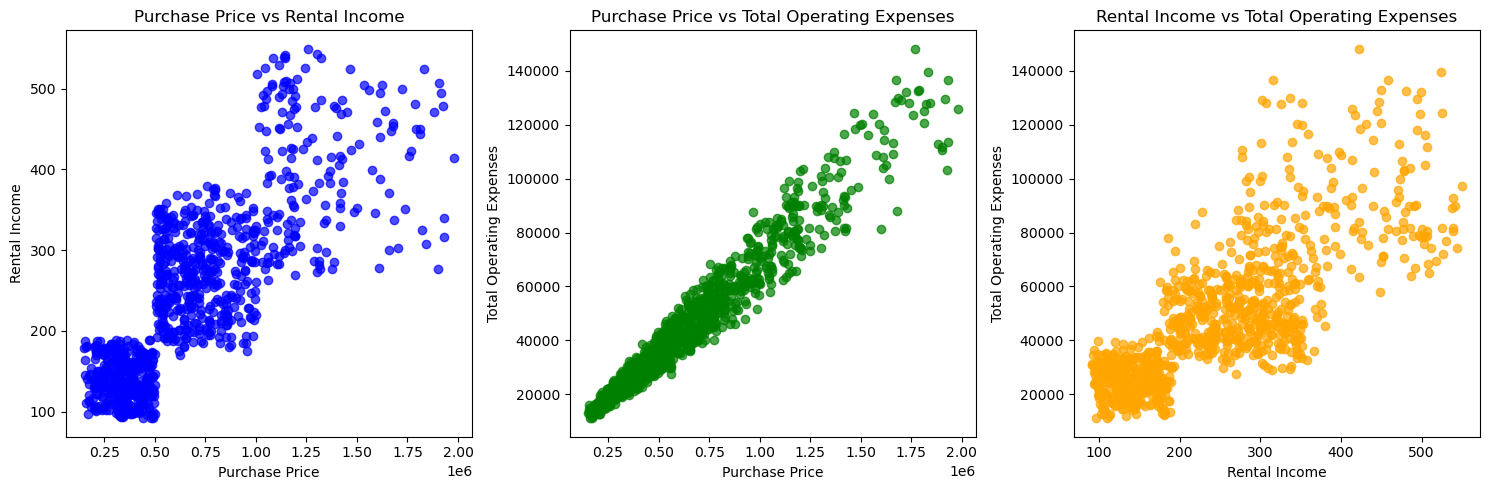

In [12]:
# Create scatter plots for numerical variables
plt.figure(figsize=(15, 5))

# Purchase Price vs Rental Income
plt.subplot(1, 3, 1)
plt.scatter(property_data['Purchase Price'], property_data['Rental Income (per night)'], color='blue', alpha=0.7)
plt.title('Purchase Price vs Rental Income')
plt.xlabel('Purchase Price')
plt.ylabel('Rental Income')

# Purchase Price vs Total Operating Expenses
plt.subplot(1, 3, 2)
plt.scatter(property_data['Purchase Price'], property_data['Total Operating Expenses (per year)'], color='green', alpha=0.7)
plt.title('Purchase Price vs Total Operating Expenses')
plt.xlabel('Purchase Price')
plt.ylabel('Total Operating Expenses')

# Rental Income vs Total Operating Expenses
plt.subplot(1, 3, 3)
plt.scatter(property_data['Rental Income (per night)'], property_data['Total Operating Expenses (per year)'], color='orange', alpha=0.7)
plt.title('Rental Income vs Total Operating Expenses')
plt.xlabel('Rental Income')
plt.ylabel('Total Operating Expenses')

plt.tight_layout()
plt.show()


## CALCULATING NET OPERATING INCOME, RETURN ON INVESTMENT AND ANALYZING PROFITABILITY BY LOCATION AND PROPERTY TYPE

In [13]:
# Calculate Net Operating Income (NOI)
property_data['Net Operating Income'] = property_data['Rental Income (per night)'] * 365 - property_data['Total Expenses']

# Evaluate Return on Investment (ROI)
property_data['ROI'] = (property_data['Net Operating Income'] / property_data['Purchase Price']) * 100

# Analyze profitability by location and property type
# Group by location and calculate average ROI
avg_roi_by_location = property_data.groupby('Location')['ROI'].mean()

# Group by property type and calculate average ROI
avg_roi_by_property_type = property_data.groupby('Property Type')['ROI'].mean()

# Display the results
print("Average ROI by Location:")
print(avg_roi_by_location)
print("\nAverage ROI by Property Type:")
print(avg_roi_by_property_type)


Average ROI by Location:
Location
Beach           4.335068
City            5.951854
Countryside    10.008188
Mountain        6.978146
Name: ROI, dtype: float64

Average ROI by Property Type:
Property Type
Apartment    7.045763
Condo        9.253660
House        5.378656
Name: ROI, dtype: float64


## PLOTTING INCOME AVERAGES AGAINST EXPENSES

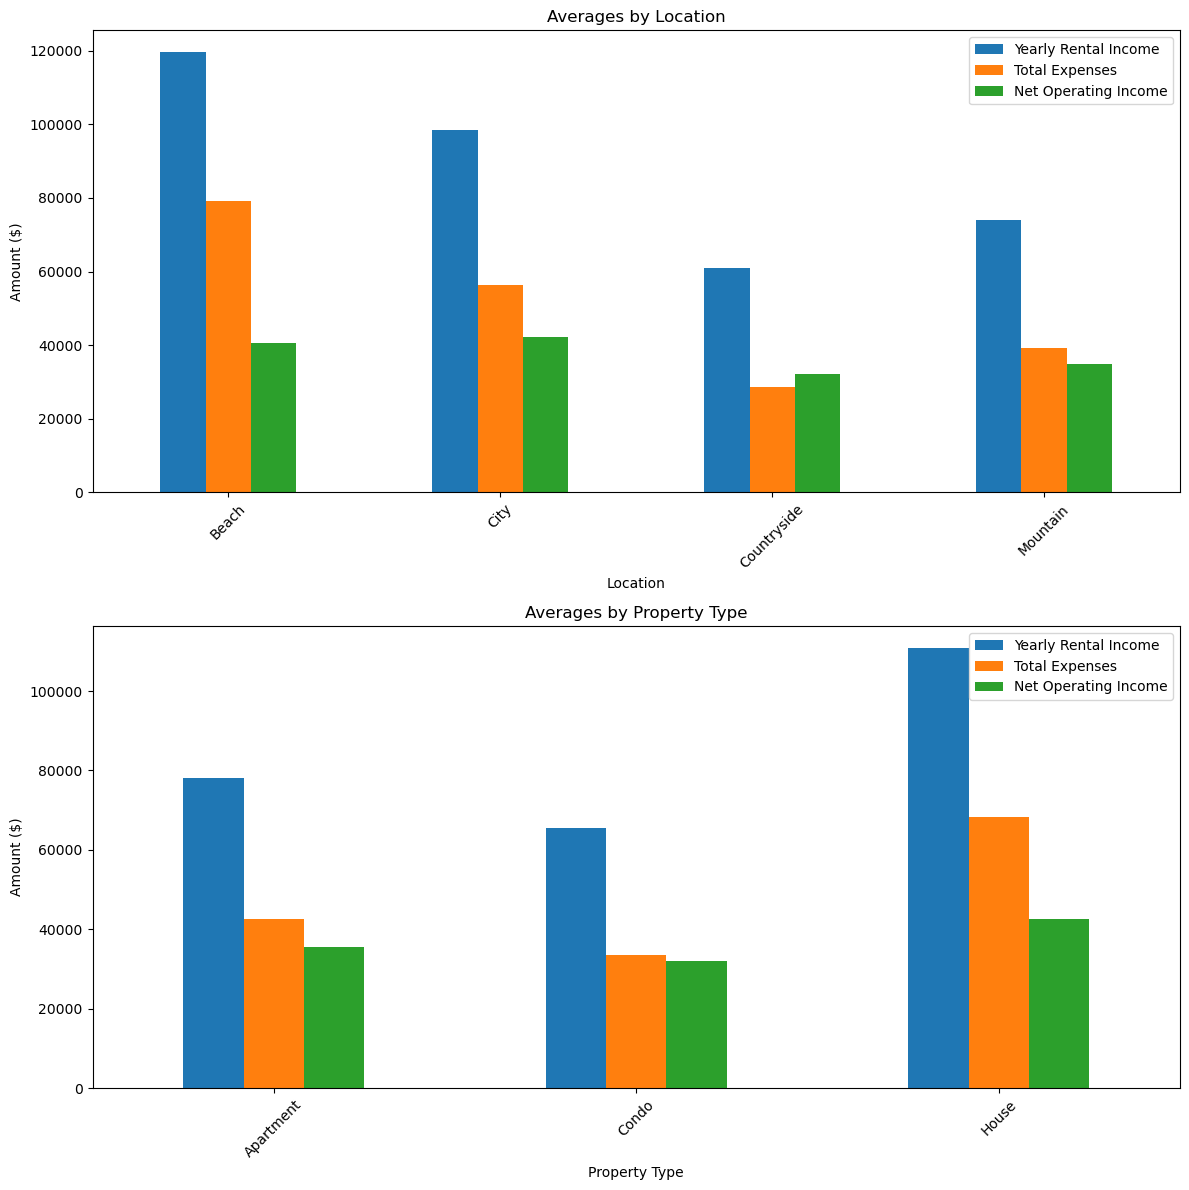

In [14]:
# Calculate averages by location and property type including yearly rental income, total expenses, and net operating income
avg_by_location = property_data.groupby('Location').agg({'Yearly Rental Income': 'mean', 'Total Expenses': 'mean', 'Net Operating Income': 'mean'})
avg_by_property_type = property_data.groupby('Property Type').agg({'Yearly Rental Income': 'mean', 'Total Expenses': 'mean', 'Net Operating Income': 'mean'})

# Create subplots for side-by-side visualization
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Grouped bar chart for averages by location
avg_by_location.plot(kind='bar', ax=axs[0])
axs[0].set_title('Averages by Location')
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Amount ($)')
axs[0].tick_params(axis='x', rotation=45)

# Grouped bar chart for averages by property type
avg_by_property_type.plot(kind='bar', ax=axs[1])
axs[1].set_title('Averages by Property Type')
axs[1].set_xlabel('Property Type')
axs[1].set_ylabel('Amount ($)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## SENSITIVITY ANALYSIS

In [15]:
# Define a range for varying rental income (e.g., +/- 10%)
rental_income_variation = 0.1  # 10% variation

# Create a copy of the dataset for sensitivity analysis
sensitivity_data = property_data.copy()

# Vary rental income by +/- 10% and recalculate financial metrics
sensitivity_data['Rental Income (per night)'] *= (1 + rental_income_variation)
sensitivity_data['Cash Flow (per year)'] = sensitivity_data['Rental Income (per night)'] * 365 - sensitivity_data['Total Operating Expenses (per year)']
sensitivity_data['Net Operating Income (NOI)'] = sensitivity_data['Rental Income (per night)'] * 365 - sensitivity_data['Total Operating Expenses (per year)']
sensitivity_data['Return on Investment (ROI)'] = (sensitivity_data['Net Operating Income (NOI)'] / sensitivity_data['Purchase Price']) * 100
sensitivity_data['Cash-on-Cash Return'] = (sensitivity_data['Cash Flow (per year)'] / sensitivity_data['Purchase Price']) * 100

# Display the first few rows of the dataset with sensitivity analysis results
print(sensitivity_data.head())


  Property ID Location Property Type  Property Size (sqft)  Purchase Price  \
0    PROP0001     City         Condo                  1483          440000   
1    PROP0002    Beach         House                  2949         1116000   
2    PROP0003     City         House                  3173         1344000   
3    PROP0004     City         Condo                   887          552000   
4    PROP0005    Beach     Apartment                   723          620000   

   Down Payment  Loan Amount  Interest Rate  Loan Term (Years)  \
0       88000.0     352000.0         0.0170                 16   
1      223200.0     892800.0         0.0217                 18   
2      268800.0    1075200.0         0.0231                 19   
3      110400.0     441600.0         0.0261                 17   
4      124000.0     496000.0         0.0226                 19   

   Rental Income (per night)  ...  Yearly Rental Income  \
0                    113.740  ...              37741.00   
1               

## PLOTTING ROI AND NOI AGAINST PURCHASE PRICE

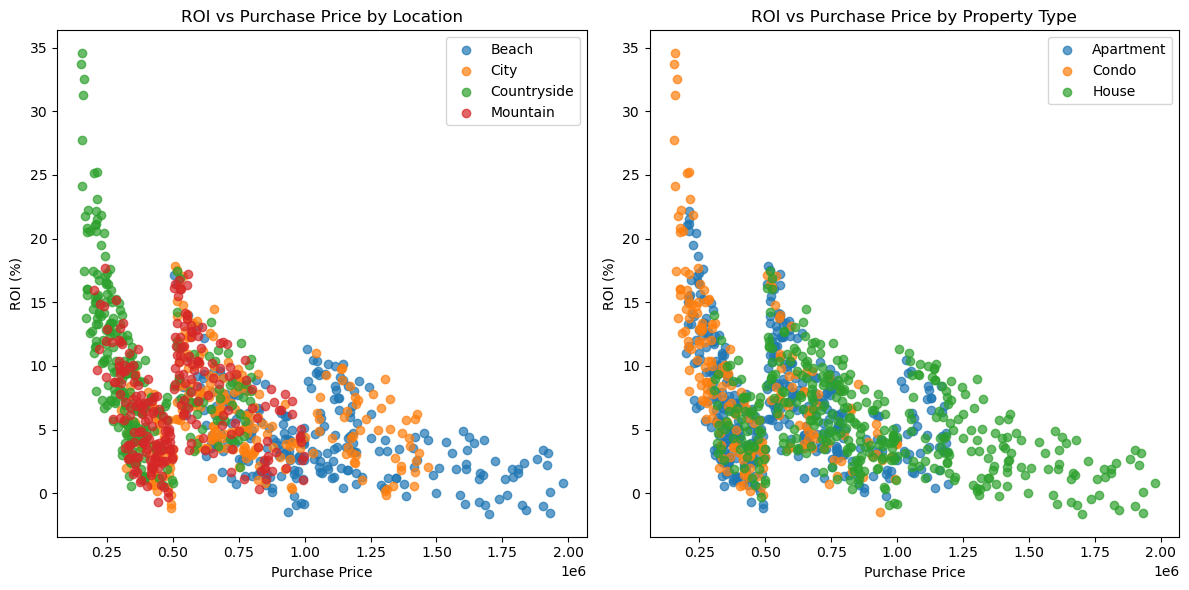

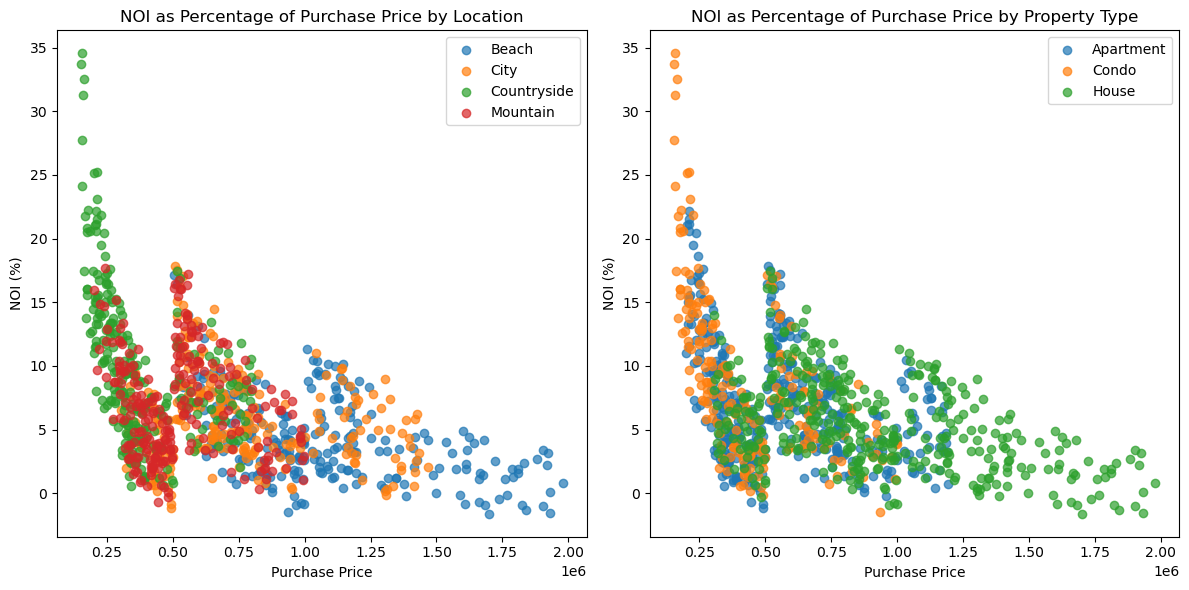

In [16]:
# Calculate ROI and NOI as percentages
property_data['ROI'] = (property_data['Net Operating Income'] / property_data['Purchase Price']) * 100
property_data['NOI_percentage'] = (property_data['Net Operating Income'] / property_data['Purchase Price']) * 100

# Create plots
plt.figure(figsize=(12, 6))

# Plot ROI against Purchase Price by location
plt.subplot(1, 2, 1)
for location, data in property_data.groupby('Location'):
    plt.scatter(data['Purchase Price'], data['ROI'], label=location, alpha=0.7)
plt.xlabel('Purchase Price')
plt.ylabel('ROI (%)')
plt.title('ROI vs Purchase Price by Location')
plt.legend()

# Plot ROI against Purchase Price by property type
plt.subplot(1, 2, 2)
for prop_type, data in property_data.groupby('Property Type'):
    plt.scatter(data['Purchase Price'], data['ROI'], label=prop_type, alpha=0.7)
plt.xlabel('Purchase Price')
plt.ylabel('ROI (%)')
plt.title('ROI vs Purchase Price by Property Type')
plt.legend()

plt.tight_layout()
plt.show()

# Create plots for NOI as percentage of purchase price
plt.figure(figsize=(12, 6))

# Plot NOI as percentage of Purchase Price by location
plt.subplot(1, 2, 1)
for location, data in property_data.groupby('Location'):
    plt.scatter(data['Purchase Price'], data['NOI_percentage'], label=location, alpha=0.7)
plt.xlabel('Purchase Price')
plt.ylabel('NOI (%)')
plt.title('NOI as Percentage of Purchase Price by Location')
plt.legend()

# Plot NOI as percentage of Purchase Price by property type
plt.subplot(1, 2, 2)
for prop_type, data in property_data.groupby('Property Type'):
    plt.scatter(data['Purchase Price'], data['NOI_percentage'], label=prop_type, alpha=0.7)
plt.xlabel('Purchase Price')
plt.ylabel('NOI (%)')
plt.title('NOI as Percentage of Purchase Price by Property Type')
plt.legend()

plt.tight_layout()
plt.show()


## PRESENT VALUE OF PORTFILIO OVER A 25 YEARS HOLD PERIOD WITH A 2% DISCOUNT RATE

In [17]:
# Assume some initial values for the analysis
num_years = 25  # Change to 25 years
discount_rate = 0.02  # Assuming a discount rate of 2%

# Initialize lists to store property details and NOI values
property_ids = []
locations = []
property_types = []
purchase_prices = []
noi_values = {f'Year_{i}': [] for i in range(1, num_years + 1)}
present_value_holdings = []  # Initialize list to store present value of holding for each property

# Iterate through each property to calculate NOI for each year
for index, row in property_data.iterrows():
    property_id = row['Property ID']
    location = row['Location']
    prop_type = row['Property Type']
    purchase_price = row['Purchase Price']
    
    # Store property details in lists
    property_ids.append(property_id)
    locations.append(location)
    property_types.append(prop_type)
    purchase_prices.append(purchase_price)
    
    total_cash_flow = 0  # Initialize total cash flow for the property
    
    # Calculate NOI for each year and discount to present value
    for year in range(1, num_years + 1):
        # For simplicity, assume NOI remains constant over the years
        # You can replace this with a more realistic model based on expected rental growth, expenses, etc.
        noi = row['Net Operating Income']
        discounted_noi = round(noi / ((1 + discount_rate) ** year), 2)
        noi_values[f'Year_{year}'].append(discounted_noi)
        
        total_cash_flow += discounted_noi  # Accumulate cash flow for each year
    
    present_value_holdings.append(total_cash_flow)  # Append total cash flow to list

# Create dataframe for NOI values
noi_df = pd.DataFrame({
    'Property ID': property_ids,
    'Location': locations,
    'Property Type': property_types,
    'Purchase Price': purchase_prices,
    **noi_values  # Add columns for NOI for each year
})

# Add column for present value of holding over 25 years
noi_df['25-Year Present Value'] = present_value_holdings

# Calculate present value of entire portfolio
portfolio_present_value = sum(present_value_holdings)


# Display the first few rows of the NOI dataframe
print(noi_df.head())
# Print present value of entire portfolio
print("Present Value of Entire Portfolio: $", round(portfolio_present_value, 2))


  Property ID Location Property Type  Purchase Price     Year_1     Year_2  \
0    PROP0001     City         Condo          440000     941.37     922.91   
1    PROP0002    Beach         House         1116000  109255.73  107113.46   
2    PROP0003     City         House         1344000   37000.27   36274.78   
3    PROP0004     City         Condo          552000   74346.50   72888.73   
4    PROP0005    Beach     Apartment          620000   39970.88   39187.14   

      Year_3     Year_4     Year_5    Year_6  ...   Year_17   Year_18  \
0     904.82     887.08     869.68    852.63  ...    685.74    672.29   
1  105013.19  102954.11  100935.40  98956.28  ...  79586.88  78026.35   
2   35563.51   34866.19   34182.53  33512.29  ...  26952.70  26424.21   
3   71459.53   70058.37   68684.67  67337.92  ...  54157.40  53095.49   
4   38418.76   37665.46   36926.92  36202.86  ...  29116.62  28545.71   

    Year_19   Year_20   Year_21   Year_22   Year_23   Year_24   Year_25  \
0    659.11    64

## PLOTTING 25 YEARS HOLD PRESENT VALUE AGAINST PURCHASE PRICE AVERAGES BY LOCATION ND PROPERTY TYPE

C:\Users\Ortega\AppData\Local\Temp\ipykernel_16436\524195226.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_by_location = noi_df.groupby('Location').mean()
C:\Users\Ortega\AppData\Local\Temp\ipykernel_16436\524195226.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_by_property_type = noi_df.groupby('Property Type').mean()


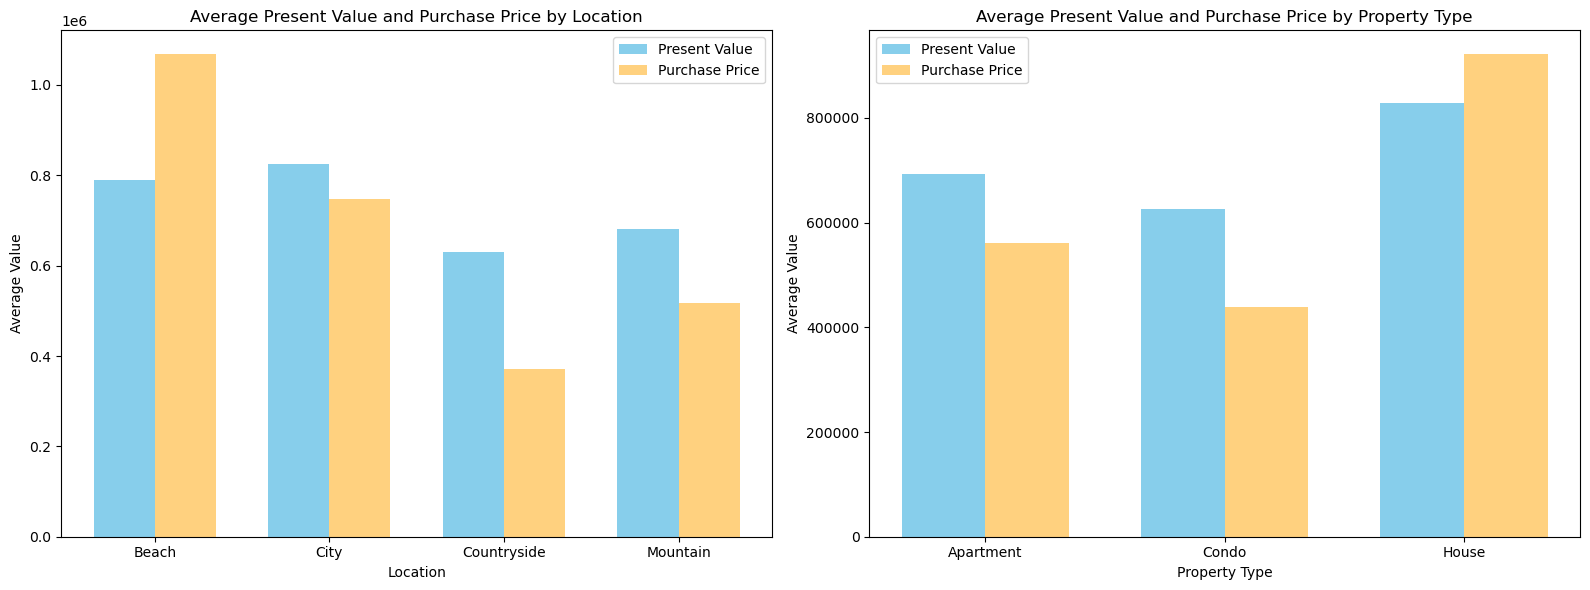

In [18]:
# Group by location and property type and calculate the averages
avg_by_location = noi_df.groupby('Location').mean()
avg_by_property_type = noi_df.groupby('Property Type').mean()

# Set the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x_loc = np.arange(len(avg_by_location))
x_prop_type = np.arange(len(avg_by_property_type))

# Plot by location and property type side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot by location
axs[0].bar(x_loc - bar_width/2, avg_by_location['25-Year Present Value'], bar_width, label='Present Value', color='skyblue')
axs[0].bar(x_loc + bar_width/2, avg_by_location['Purchase Price'], bar_width, label='Purchase Price', color='orange', alpha=0.5)
axs[0].set_title('Average Present Value and Purchase Price by Location')
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Average Value')
axs[0].set_xticks(x_loc)
axs[0].set_xticklabels(avg_by_location.index)
axs[0].legend()

# Plot by property type
axs[1].bar(x_prop_type - bar_width/2, avg_by_property_type['25-Year Present Value'], bar_width, label='Present Value', color='skyblue')
axs[1].bar(x_prop_type + bar_width/2, avg_by_property_type['Purchase Price'], bar_width, label='Purchase Price', color='orange', alpha=0.5)
axs[1].set_title('Average Present Value and Purchase Price by Property Type')
axs[1].set_xlabel('Property Type')
axs[1].set_ylabel('Average Value')
axs[1].set_xticks(x_prop_type)
axs[1].set_xticklabels(avg_by_property_type.index)
axs[1].legend()

plt.tight_layout()
plt.show()


In [19]:
## AVERAGES OF ENTIRE NUMERIC VALUES IN PORTFOLIO

In [20]:
# Display averages for all numeric data in the dataset
averages = property_data.describe().loc['mean']
print(averages)

Property Size (sqft)                     1773.706000
Purchase Price                         674905.000000
Down Payment                           134981.000000
Loan Amount                            539924.000000
Interest Rate                               0.022641
Loan Term (Years)                          17.396000
Rental Income (per night)                 241.559760
Vacancy Rate                                0.093370
Vacancy Rate (%)                            9.337000
Yearly Rental Income                    88169.312400
Total Operating Expenses (per year)     47535.608860
Yearly Loan Repayment                    3157.503020
Total Expenses                          50693.111880
Net Operating Income                    37476.200520
ROI                                         6.842758
NOI_percentage                              6.842758
Name: mean, dtype: float64


## SUMMARY OF PORTFOLIO PERFORMANCE BY LOCATION AND PROPERTY TYPE

In [21]:
# Count of properties categorized as profitable and unprofitable by location
properties_by_location = noi_df.groupby('Location').agg({
    '25-Year Present Value': lambda x: (x >= 0).sum()  # Count of profitable properties
})
properties_by_location['Unprofitable'] = noi_df.groupby('Location')['25-Year Present Value'].apply(lambda x: (x < 0).sum())  # Count of unprofitable properties
properties_by_location.rename(columns={'25-Year Present Value': 'Profitable'}, inplace=True)
print("Properties by Location:")
print(properties_by_location)

# Count of properties categorized as profitable and unprofitable by property type
properties_by_type = noi_df.groupby('Property Type').agg({
    '25-Year Present Value': lambda x: (x >= 0).sum()  # Count of profitable properties
})
properties_by_type['Unprofitable'] = noi_df.groupby('Property Type')['25-Year Present Value'].apply(lambda x: (x < 0).sum())  # Count of unprofitable properties
properties_by_type.rename(columns={'25-Year Present Value': 'Profitable'}, inplace=True)
print("\nProperties by Property Type:")
print(properties_by_type)


Properties by Location:
             Profitable  Unprofitable
Location                             
Beach               231            17
City                248             4
Countryside         257             0
Mountain            241             2

Properties by Property Type:
               Profitable  Unprofitable
Property Type                          
Apartment             414             4
Condo                 196             2
House                 367            17
